In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 

warnings.filterwarnings('ignore')

## **1. Read Data**

In [2]:
df = pd.read_csv('./archive/supermarket_sales.csv')
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


## **2. EDA (Exploratory of Data Analysis)** 

In [3]:
# first look dimension of data we have
print(f'1. Dimension of data : {df.shape}')

# second look at the columns we have
print('\n2. Columns :\n', df.columns)

1. Dimension of data : (1000, 17)

2. Columns :
 Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating'],
      dtype='object')


In [4]:
# third statistic information 
df.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1.000000e+03,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905e+00,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,6.131498e-14,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905e+00,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905e+00,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905e+00,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905e+00,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905e+00,49.650000,10.00000


**from a statistical point of view regarding the diversity of the data, if the standard deviation (std) is smaller than the mean (mean), then it provides information that the data is not too diverse. In the non-variable column that has empty data, it can be filled with the average value.**

In [5]:
# next, we look a null data we have
df.isna().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

**no null data**

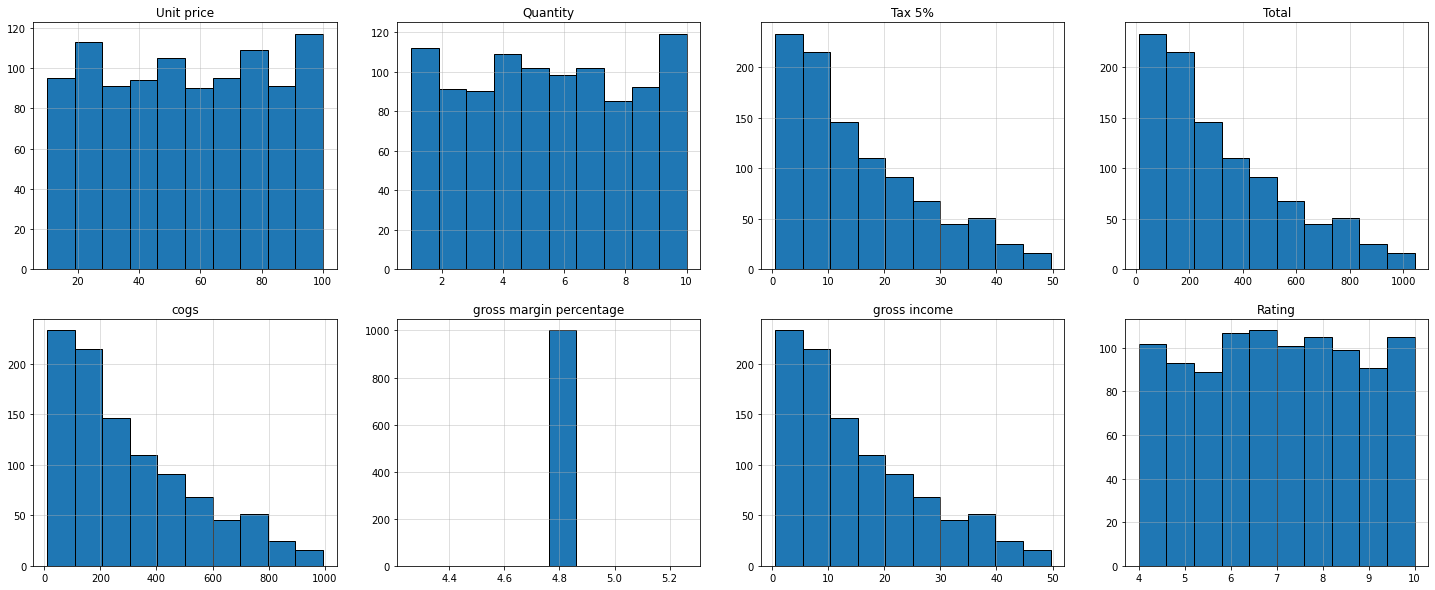

In [6]:
# Now I try to plot numerical data from the dataset that we have.
cols = df.describe().columns

fig, axes = plt.subplots(2,4, figsize=(25, 10))

for i, ax in zip(cols, axes.flatten()):
    ax.title.set_text(i)
    ax.hist(data=df, x=i, edgecolor='black', label=i)
    ax.grid(alpha=0.5)

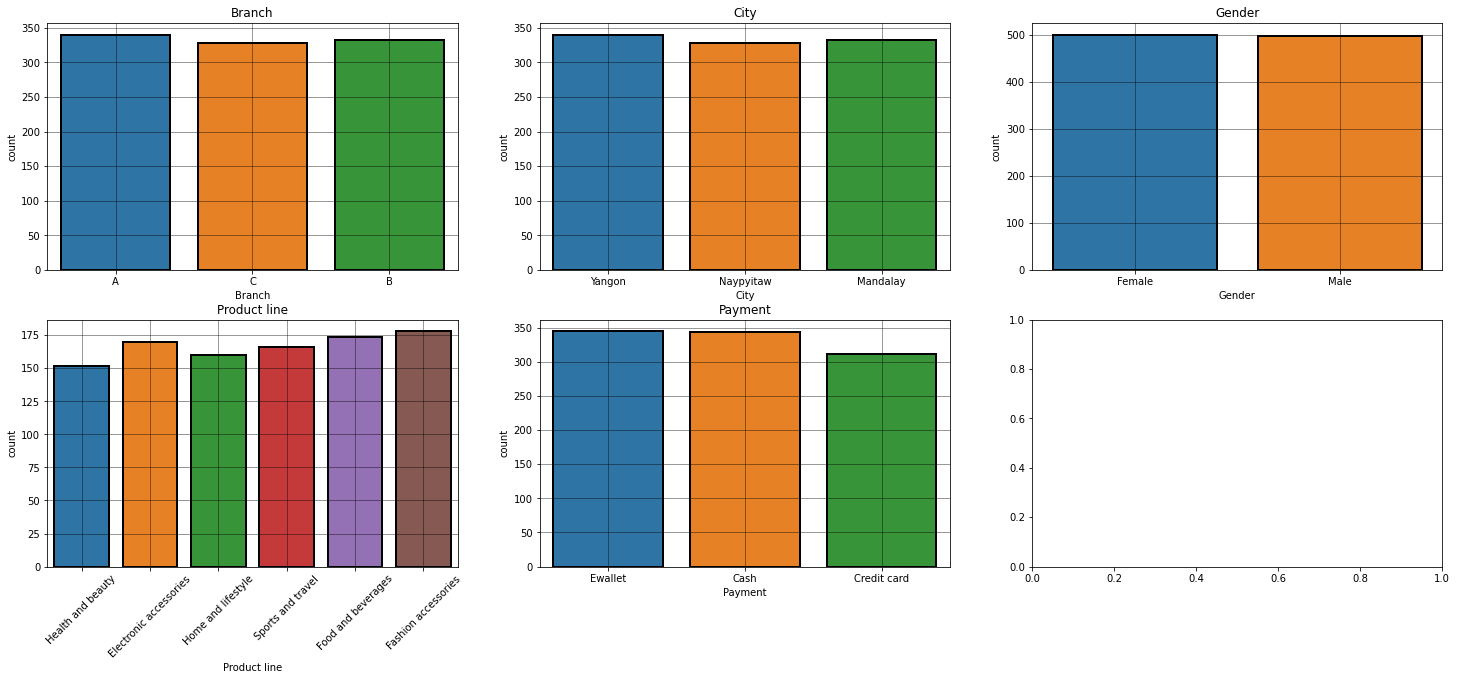

In [7]:
# Next try to plot categorical data from the dataset that we have.
categorical = ['Branch', 'City', 'Gender', 'Product line', 'Payment']

fig, axes = plt.subplots(2,3, figsize=(25, 10))

for i, ax in zip(categorical, axes.flatten()):
    if i == 'Product line':
        ax.title.set_text(i)
        chart = sns.countplot(data=df, x=i, ax=ax, saturation=0.8, linewidth=2, edgecolor='black')
        chart.set_xticklabels(chart.get_xticklabels(), rotation=45)
        ax.grid(c='black', alpha=0.5)
    else:
        ax.title.set_text(i)
        sns.countplot(data=df, x=i, ax=ax, saturation=0.8, linewidth=2, edgecolor='black')
        ax.grid(c='black', alpha=0.5)

<Figure size 720x504 with 0 Axes>

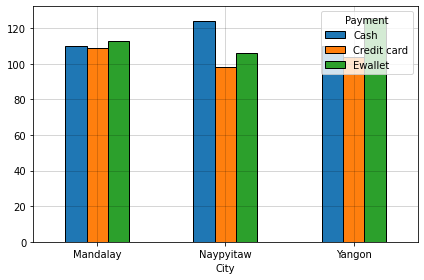

In [8]:
plt.figure(figsize=(10, 7))
pd.crosstab(df['City'], df['Payment']).plot.bar(edgecolor='black')
plt.grid(alpha=0.2, c='black')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

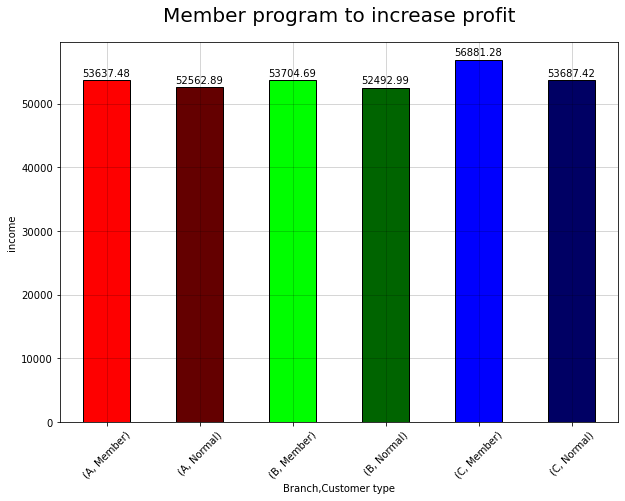

In [39]:
# now I will plot to see the role of the member program or not in increasing profits
branch_customer_group = df.groupby(['Branch', 'Customer type'])['Total'].sum()

plt.figure(figsize=(10, 7))
plt.title('Member program to increase profit', pad=20, fontsize=20)
plots = branch_customer_group.plot(kind='bar', edgecolor='black', color = [(255/256,0,0), (100/256,0,0), (0,255/256,0), (0,100/256,0), (0,0,255/256), (0,0,100/256)], )
plt.xticks(rotation=45)
plt.ylabel('income')
plt.grid(alpha=0.2, c='black')

for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=10, xytext=(0, 7),
                   textcoords='offset points')

plt.show()

**from the graph shown, it shows the role of the member program in providing higher income than non-members in each existing branch.**

**next I will try to show you how much the difference in income between members and non-members.**

In [52]:
branch_A = branch_customer_group.A[0] - branch_customer_group.A[1]
branch_B = branch_customer_group.B[0] - branch_customer_group.B[1]
branch_C = branch_customer_group.C[0] - branch_customer_group.C[1]

print('1. Increased income through the member program at Branch A : %f'%branch_A)
print('2. Increased income through the member program at Branch B : %f'%branch_B)
print('3. Increased income through the member program at Branch C : %f'%branch_C)

1. Increased income through the member program at Branch A : 1074.580500
2. Increased income through the member program at Branch B : 1211.700000
3. Increased income through the member program at Branch C : 3193.858500


**Seen a considerable increase in income through the member program in each Branch and the highest is found in Branch C of 3193,858500**

**If the Branch is combined and seen the percentage of income in the last 3 months by reviewing income from members and non-members.**

In [35]:
# Now I will show you what percentage of the member program can increase the income profit of this company.

all_profit = df.Total.sum()
member_income_percentage = df[df['Customer type'] =='Member'].Total.sum()*100/all_profit
normal_income_percentage = df[df['Customer type'] =='Normal'].Total.sum()*100/all_profit

print(f'1. Icome percentage of Member : {member_income_percentage}')
print(f'2. Icome percentage of Normal : {normal_income_percentage}')

1. Icome percentage of Member : 50.84840606919569
2. Icome percentage of Normal : 49.15159393080431


**Member program can increase profit by 1.6968121383913797 percent. Or in another sense, in the last 3 months by implementing this member program, the company made a profit of 548013.9000000002.**

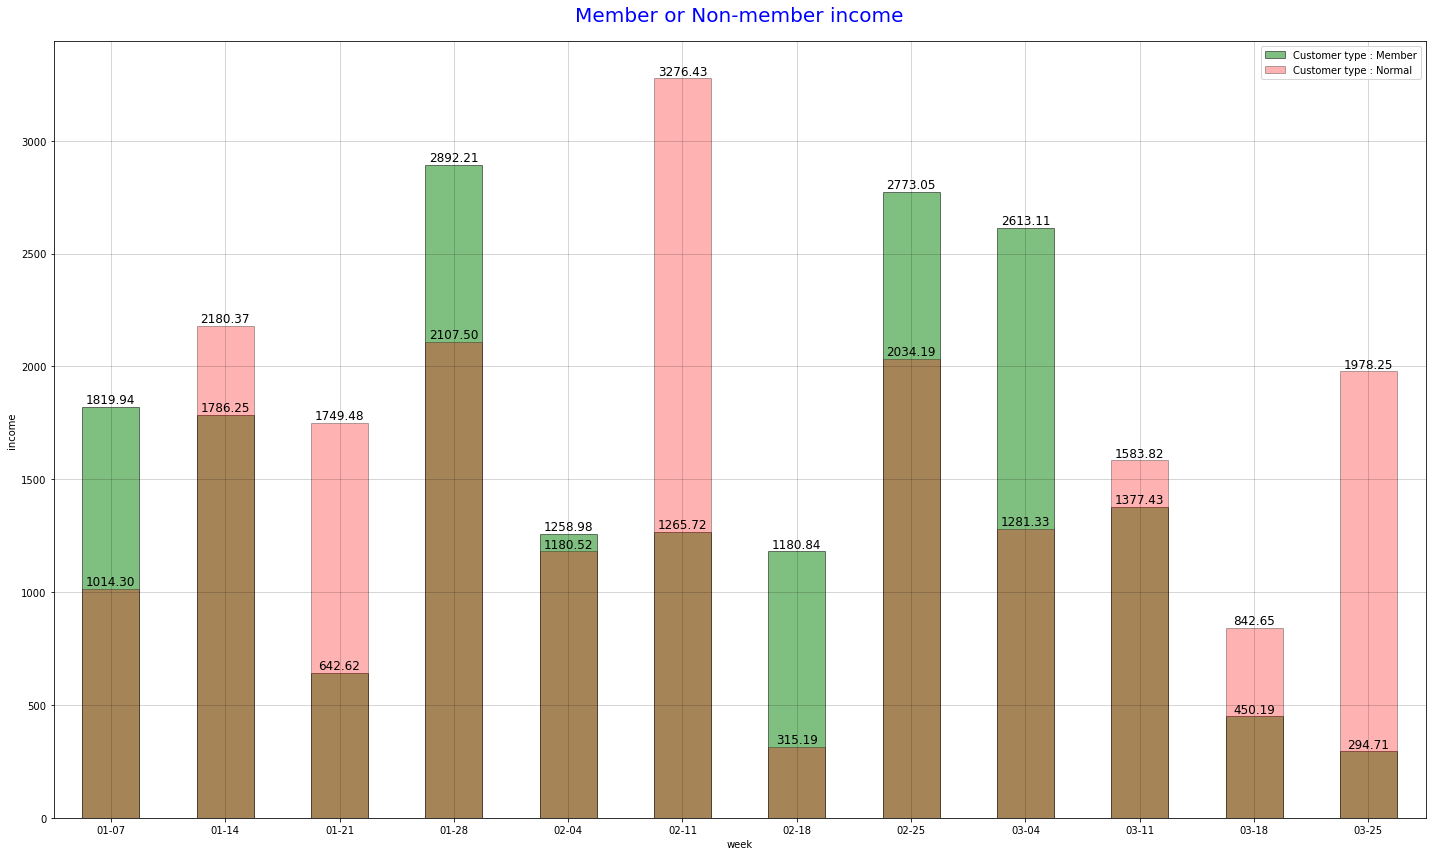

In [57]:
week = df
week.Date = pd.to_datetime(week.Date)
week = week.set_index('Date')
week = week[week.index.dayofweek.isin([0])].sort_index(ascending=True)
week = week.reset_index()

Member = week[week['Customer type'] == 'Member']
Member['week'] = Member.Date.dt.strftime("%m-%d")

Normal = week[week['Customer type'] == 'Normal']
Normal['week'] = Normal.Date.dt.strftime("%m-%d")

data = [Member, Normal]

plt.figure(figsize=(20, 12))
plt.title('Member or Non-member income', pad=20, fontsize=20, c='b')
plot_1 = Member.groupby(['week'])['Total'].sum().plot(kind='bar', edgecolor='black', color='green', alpha=0.5, label='Customer type : Member')
plot_2 = Normal.groupby(['week'])['Total'].sum().plot(kind='bar', edgecolor='black', color='red', alpha=0.3, label='Customer type : Normal')

for bar in plot_2.patches:
    plot_2.annotate(format(bar.get_height(), '.2f'), (bar.get_x() + bar.get_width() / 2, bar.get_height()), ha='center', va='center', size=12, xytext=(0, 7), textcoords='offset points')
    
plt.legend()
plt.xticks(rotation=0)
plt.ylabel('income')
plt.grid(alpha=0.2, c='black')
plt.tight_layout()
plt.show()

**The graph above shows the income of members and non-members per week. Member program shows higher income than non-member program in weeks 1, 4, 5, 7, 8, 9.**

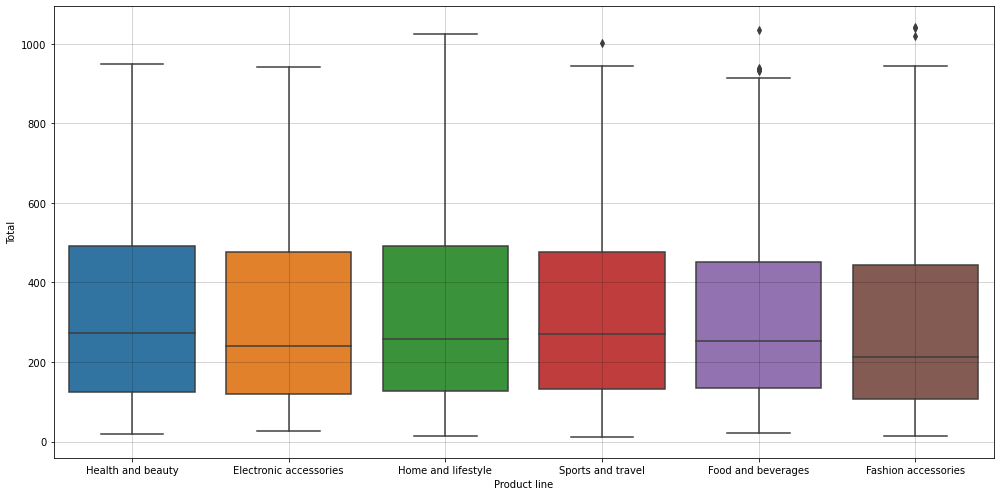

In [12]:
plt.figure(figsize=(14, 7))
sns.boxplot(x=df['Product line'], y=df['Total'], data=df)
plt.grid(alpha=0.2, c='black')
plt.tight_layout()
plt.show()

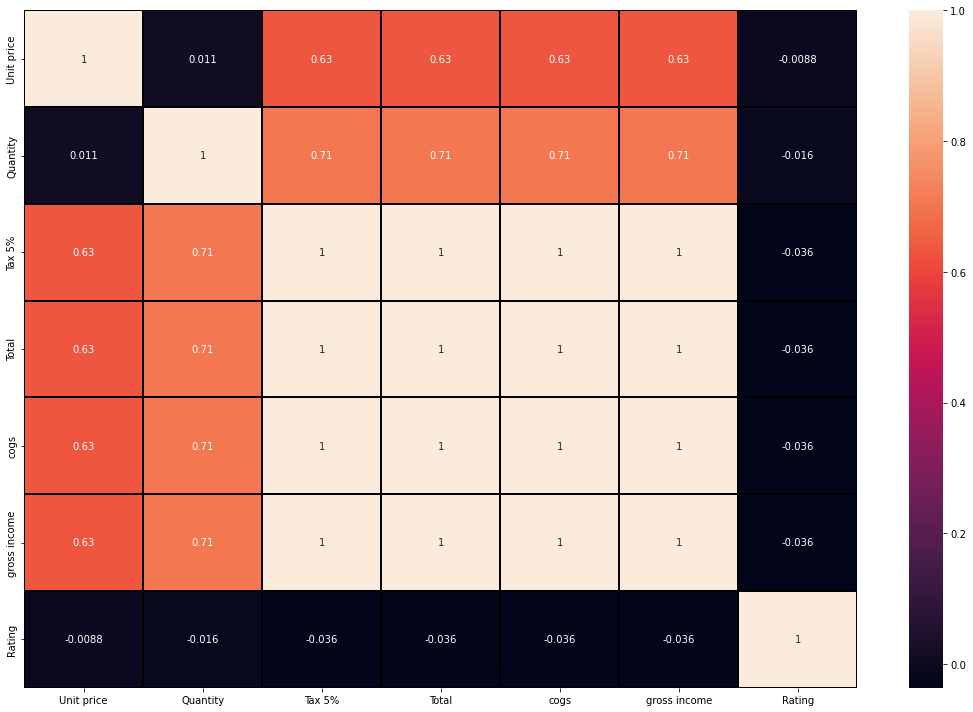

In [33]:
data_corr = df.drop(columns=['gross margin percentage'], axis=1)

corr = data_corr.corr()

plt.figure(figsize=(15, 10))
sns.heatmap(corr, annot=True, linewidths=2, linecolor='black')
plt.tight_layout()
plt.show()